In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as pg

import warnings
warnings.filterwarnings("ignore")

In [2]:
eth_df = pd.read_csv('ETH-USD.csv')

In [3]:
eth_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-10-01,0.734307,0.734307,0.655906,0.690215,0.690215,5.960840e+05
1,2015-10-02,0.683732,0.691120,0.654605,0.678574,0.678574,2.193180e+05
2,2015-10-03,0.678783,0.709204,0.675482,0.687171,0.687171,1.633260e+05
3,2015-10-04,0.686343,0.693126,0.660716,0.668379,0.668379,1.034970e+05
4,2015-10-05,0.666784,0.674438,0.624450,0.628643,0.628643,2.342630e+05
...,...,...,...,...,...,...,...
2216,2021-10-25,4084.425781,4236.666992,4072.034668,4217.876953,4217.876953,1.599573e+10
2217,2021-10-26,4217.337891,4289.131348,4106.823730,4131.102051,4131.102051,1.715771e+10
2218,2021-10-27,4132.173340,4299.152832,3930.257324,3930.257324,3930.257324,2.621953e+10
2219,2021-10-28,3924.815430,4293.150879,3905.706055,4287.318848,4287.318848,2.595815e+10


In [4]:
eth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221 entries, 0 to 2220
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2221 non-null   object 
 1   Open       2217 non-null   float64
 2   High       2217 non-null   float64
 3   Low        2217 non-null   float64
 4   Close      2217 non-null   float64
 5   Adj Close  2217 non-null   float64
 6   Volume     2217 non-null   float64
dtypes: float64(6), object(1)
memory usage: 121.6+ KB


In [5]:
eth_df['Date'] = pd.to_datetime(eth_df['Date'])

In [6]:
eth_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2221 entries, 0 to 2220
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2221 non-null   datetime64[ns]
 1   Open       2217 non-null   float64       
 2   High       2217 non-null   float64       
 3   Low        2217 non-null   float64       
 4   Close      2217 non-null   float64       
 5   Adj Close  2217 non-null   float64       
 6   Volume     2217 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 121.6 KB


In [7]:
eth_df.isnull().sum()

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

In [8]:
eth_data = eth_df.dropna()

In [9]:
eth_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
eth_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-10-01,0.734307,0.734307,0.655906,0.690215,0.690215,5.960840e+05
1,2015-10-02,0.683732,0.691120,0.654605,0.678574,0.678574,2.193180e+05
2,2015-10-03,0.678783,0.709204,0.675482,0.687171,0.687171,1.633260e+05
3,2015-10-04,0.686343,0.693126,0.660716,0.668379,0.668379,1.034970e+05
4,2015-10-05,0.666784,0.674438,0.624450,0.628643,0.628643,2.342630e+05
...,...,...,...,...,...,...,...
2216,2021-10-25,4084.425781,4236.666992,4072.034668,4217.876953,4217.876953,1.599573e+10
2217,2021-10-26,4217.337891,4289.131348,4106.823730,4131.102051,4131.102051,1.715771e+10
2218,2021-10-27,4132.173340,4299.152832,3930.257324,3930.257324,3930.257324,2.621953e+10
2219,2021-10-28,3924.815430,4293.150879,3905.706055,4287.318848,4287.318848,2.595815e+10


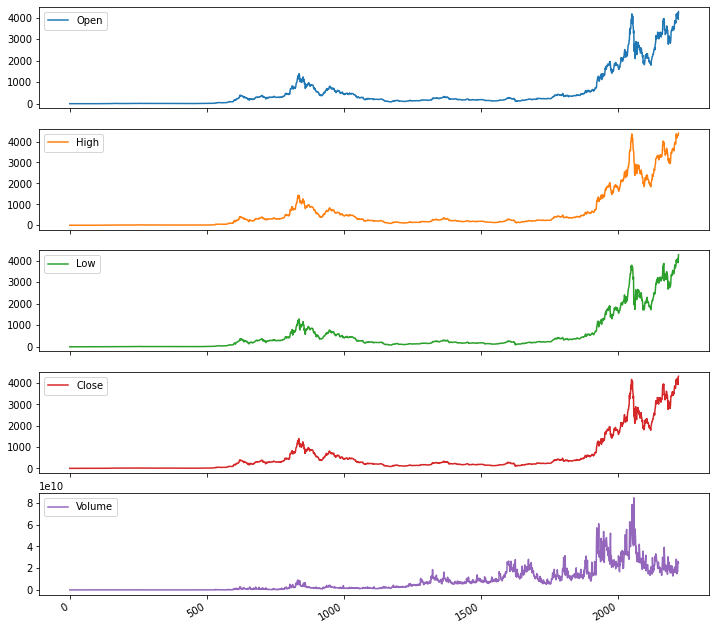

In [11]:
eth_data[["Open", "High", "Low", "Close", "Volume"]].plot(subplots=True, figsize=(12, 12));
plt.show();

In [12]:
# plot the close price
x = eth_data["Date"]
y = eth_data["Close"]

fig = pg.Figure()

fig.add_trace(pg.Scatter(x=x, y=y))

# Set title
fig.update_layout(title_text="Time series plot of Ethereum Close Price")

#Set Categories
fig.update_layout(xaxis=dict(rangeselector=dict(buttons=list([
    dict(count=1, label="1m", step="month", stepmode="backward"),
    dict(count=6, label="6m", step="month", stepmode="backward"),
    dict(count=1, label="YTD", step="year", stepmode="todate"),
    dict(count=1, label="1y", step="year", stepmode="backward"),
    dict(step="all")])), rangeslider=dict(visible=True), type="date"))

In [13]:
eth_data.set_index('Date',inplace = True)

In [14]:
Eth = eth_data.sort_values(by = 'Date',ignore_index=True)
Eth

,Open,High,Low,Close,Adj Close,Volume
0,0.734307,0.734307,0.655906,0.690215,0.690215,5.960840e+05
1,0.683732,0.691120,0.654605,0.678574,0.678574,2.193180e+05
2,0.678783,0.709204,0.675482,0.687171,0.687171,1.633260e+05
3,0.686343,0.693126,0.660716,0.668379,0.668379,1.034970e+05
4,0.666784,0.674438,0.624450,0.628643,0.628643,2.342630e+05
...,...,...,...,...,...,...
2212,4084.425781,4236.666992,4072.034668,4217.876953,4217.876953,1.599573e+10
2213,4217.337891,4289.131348,4106.823730,4131.102051,4131.102051,1.715771e+10
2214,4132.173340,4299.152832,3930.257324,3930.257324,3930.257324,2.621953e+10
2215,3924.815430,4293.150879,3905.706055,4287.318848,4287.318848,2.595815e+10


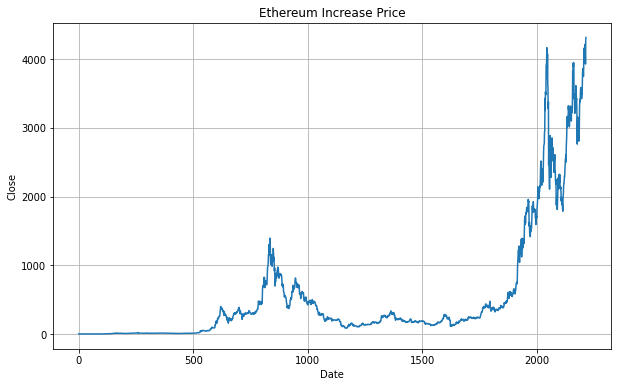

In [15]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(Eth['Close'])
plt.title("Ethereum Increase Price")
plt.show()

It is clear that Ethereum price is in an increase trend. So it is difficult to convert it to stationary directly. Let's quickly check the stationary pattern for this type of trend.

In [16]:
Eth["shift"]=Eth["Close"]-Eth["Close"].shift(1)
Eth.head()

,Open,High,Low,Close,Adj Close,Volume,shift
0,0.734307,0.734307,0.655906,0.690215,0.690215,596084.0,NaN
1,0.683732,0.691120,0.654605,0.678574,0.678574,219318.0,-0.011641
2,0.678783,0.709204,0.675482,0.687171,0.687171,163326.0,0.008597
3,0.686343,0.693126,0.660716,0.668379,0.668379,103497.0,-0.018792
4,0.666784,0.674438,0.624450,0.628643,0.628643,234263.0,-0.039736


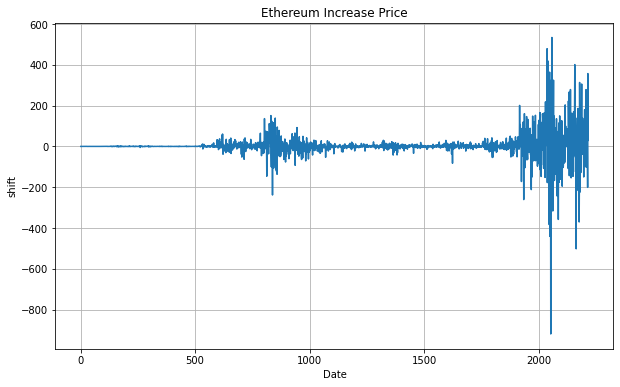

In [17]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("shift")
plt.plot(Eth['shift'])
plt.title("Ethereum Increase Price")
plt.show()

This trend does not show a stable stationarity. In order to overcome this, Either log or square root method can be applied. 

In [18]:
log_df = Eth['Close'].apply(np.log)

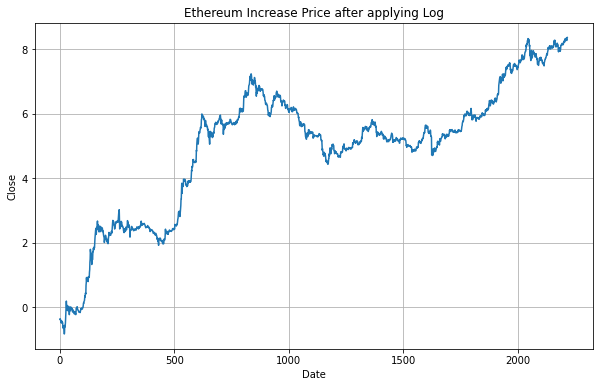

In [19]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Close")
plt.plot(log_df)
plt.title("Ethereum Increase Price after applying Log")
plt.show()

In [20]:
Eth["Log Close"] = Eth['Close'].apply(np.log)
Eth.head()

,Open,High,Low,Close,Adj Close,Volume,shift,Log Close
0,0.734307,0.734307,0.655906,0.690215,0.690215,596084.0,NaN,-0.370752
1,0.683732,0.691120,0.654605,0.678574,0.678574,219318.0,-0.011641,-0.387762
2,0.678783,0.709204,0.675482,0.687171,0.687171,163326.0,0.008597,-0.375172
3,0.686343,0.693126,0.660716,0.668379,0.668379,103497.0,-0.018792,-0.402900
4,0.666784,0.674438,0.624450,0.628643,0.628643,234263.0,-0.039736,-0.464192


In [21]:
Eth["s1"]=Eth["Log Close"]-Eth["Log Close"].shift(1)
Eth.head()

,Open,High,Low,Close,Adj Close,Volume,shift,Log Close,s1
0,0.734307,0.734307,0.655906,0.690215,0.690215,596084.0,NaN,-0.370752,NaN
1,0.683732,0.691120,0.654605,0.678574,0.678574,219318.0,-0.011641,-0.387762,-0.017010
2,0.678783,0.709204,0.675482,0.687171,0.687171,163326.0,0.008597,-0.375172,0.012590
3,0.686343,0.693126,0.660716,0.668379,0.668379,103497.0,-0.018792,-0.402900,-0.027728
4,0.666784,0.674438,0.624450,0.628643,0.628643,234263.0,-0.039736,-0.464192,-0.061292


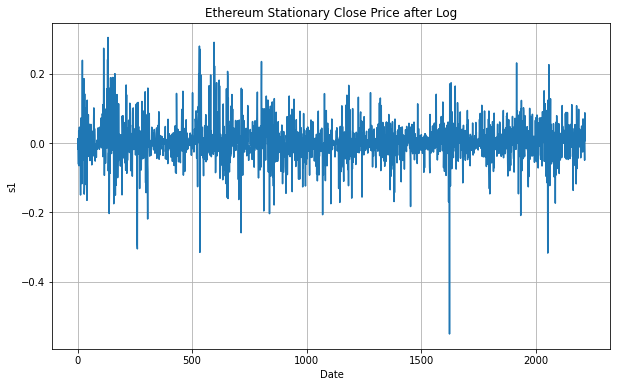

In [22]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("s1")
plt.plot(Eth['s1'])
plt.title("Ethereum Stationary Close Price after Log")
plt.show()

In [23]:
Eth.dropna(inplace=True)
Eth.head()

,Open,High,Low,Close,Adj Close,Volume,shift,Log Close,s1
1,0.683732,0.691120,0.654605,0.678574,0.678574,219318.0,-0.011641,-0.387762,-0.017010
2,0.678783,0.709204,0.675482,0.687171,0.687171,163326.0,0.008597,-0.375172,0.012590
3,0.686343,0.693126,0.660716,0.668379,0.668379,103497.0,-0.018792,-0.402900,-0.027728
4,0.666784,0.674438,0.624450,0.628643,0.628643,234263.0,-0.039736,-0.464192,-0.061292
5,0.622218,0.653944,0.606230,0.650645,0.650645,262674.0,0.022002,-0.429791,0.034401


In [24]:
#ADfuller Test - For checking stationary data
from statsmodels.tsa.stattools import adfuller

In [25]:
ADF_test=adfuller(Eth["s1"],autolag="AIC")

In [26]:
print(ADF_test)

(-8.887740595465807, 1.2667144484856085e-14, 18, 2197, {'1%': -3.433329953061165, '5%': -2.8628564476416725, '10%': -2.5674708095410446}, -6184.908823290232)


In [27]:
#Null Hypothesis H0: No Stationary
#Alternative Hypothesis: Stationary
output=pd.DataFrame(ADF_test[0:4],index=['Test Statistics',"p-value","Lag","number of observation"])
output

,0
Test Statistics,-8.887741e+00
p-value,1.266714e-14
Lag,1.800000e+01
number of observation,2.197000e+03


#ARIMA - AutoRegressive Integrated Moving Average


In [28]:
# AR - AutoRegressor - p(symbol)
# I - Integrated - d(symbol) - after checking stationary we got d value = 1
# MA - Moving Average - q(symbol)

In [29]:
Eth.shape

(2216, 9)

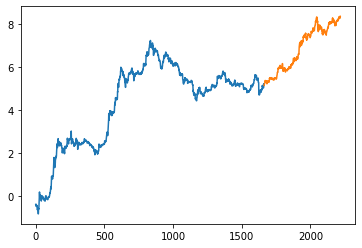

In [30]:
Train = Eth["Log Close"].loc[:1662]
Test = Eth["Log Close"].loc[1663:]
plt.plot(Train)
plt.plot(Test)

75% of data used for training the model and 25% data used for testing

In [31]:
from statsmodels.tsa.arima_model import ARIMA

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [33]:
#For identifying p value we have to use plot pacf

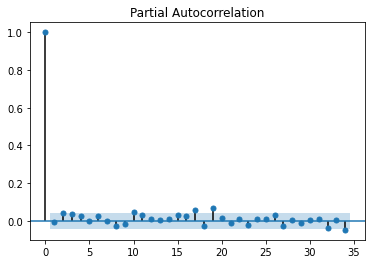

In [34]:
plot_pacf(Eth["s1"]); # p=0 - by using AutoRegressive

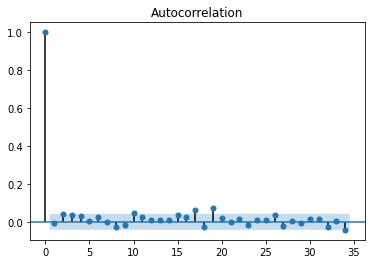

In [35]:
plot_acf(Eth[['s1']]); #q=0 A MA term is technically the error of the lagged forecast

In [36]:
from statsmodels.tsa.arima_model import ARIMA

In [37]:
model_arima=ARIMA(Train,order=(0,1,0)) #p(AR)=0, d(I)=1, q(MA)=0
model_arima_fit=model_arima.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



In [38]:
y_pred=model_arima_fit.forecast(steps=554)[0]
y_pred=pd.DataFrame(y_pred)
y_pred

,0
0,5.152554
1,5.155888
2,5.159221
3,5.162555
4,5.165888
...,...
549,6.982658
550,6.985992
551,6.989325
552,6.992659


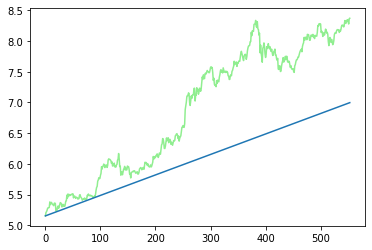

In [39]:
plt.plot(np.array(Test),color='lightgreen')
plt.plot(np.array(y_pred))

#MSE nd RMSE

In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
MSE = mean_squared_error(Test,y_pred)
MSE

0.9244168371247722

In [42]:
RMSE = np.sqrt(MSE)
RMSE

0.9614659833425061

#Decompose

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 432x288 with 0 Axes>

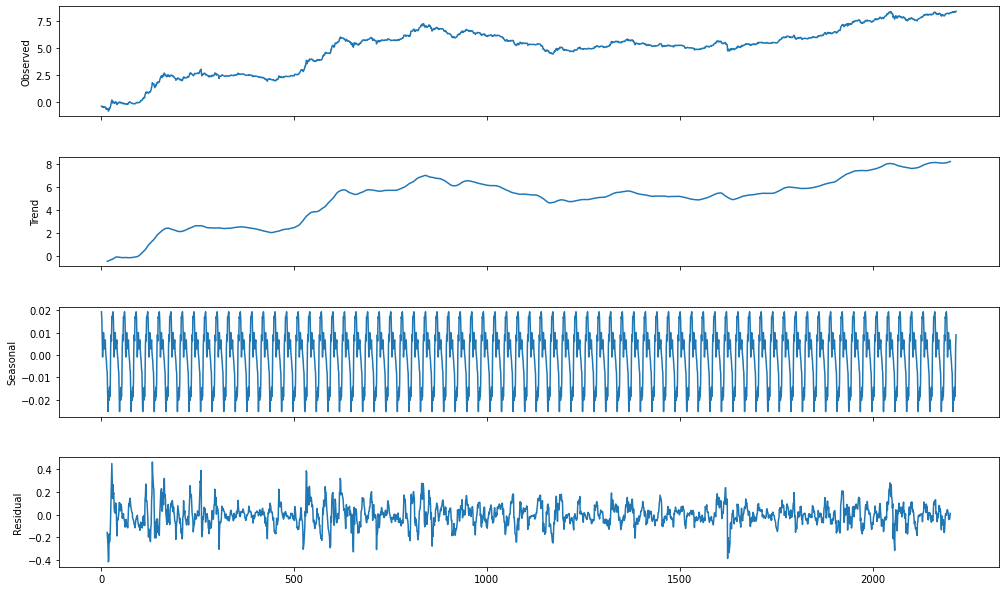

In [44]:
result = seasonal_decompose(Eth['Log Close'], model='additive', freq = 30);
fig = plt.figure();  
fig = result.plot();  
fig.set_size_inches(16, 9);

In [45]:
eth_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-10-01,0.734307,0.734307,0.655906,0.690215,0.690215,596084.0
2015-10-02,0.683732,0.691120,0.654605,0.678574,0.678574,219318.0
2015-10-03,0.678783,0.709204,0.675482,0.687171,0.687171,163326.0
2015-10-04,0.686343,0.693126,0.660716,0.668379,0.668379,103497.0
2015-10-05,0.666784,0.674438,0.624450,0.628643,0.628643,234263.0


In [46]:
eth_hw = eth_data.reset_index()

In [47]:
eth_hw.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-10-01,0.734307,0.734307,0.655906,0.690215,0.690215,596084.0
1,2015-10-02,0.683732,0.691120,0.654605,0.678574,0.678574,219318.0
2,2015-10-03,0.678783,0.709204,0.675482,0.687171,0.687171,163326.0
3,2015-10-04,0.686343,0.693126,0.660716,0.668379,0.668379,103497.0
4,2015-10-05,0.666784,0.674438,0.624450,0.628643,0.628643,234263.0


In [48]:
eth_hw["Log Close"] = eth_hw['Close'].apply(np.log)

In [49]:
eth_hw.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Log Close
0,2015-10-01,0.734307,0.734307,0.655906,0.690215,0.690215,596084.0,-0.370752
1,2015-10-02,0.683732,0.691120,0.654605,0.678574,0.678574,219318.0,-0.387762
2,2015-10-03,0.678783,0.709204,0.675482,0.687171,0.687171,163326.0,-0.375172
3,2015-10-04,0.686343,0.693126,0.660716,0.668379,0.668379,103497.0,-0.402900
4,2015-10-05,0.666784,0.674438,0.624450,0.628643,0.628643,234263.0,-0.464192


In [50]:
eth_hw = eth_hw[['Date','Log Close']]

In [51]:
eth_hw.head()

,Date,Log Close
0,2015-10-01,-0.370752
1,2015-10-02,-0.387762
2,2015-10-03,-0.375172
3,2015-10-04,-0.402900
4,2015-10-05,-0.464192


# Holt Winters Technique

In [52]:
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing as HWSES   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

In [53]:
# Set the frequency of the date time index as Monthly start as indicated by the data
eth_hw.index.freq = 'MS'
# Set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2*m)

Holt Winters Single Exponential Smoothing Graph

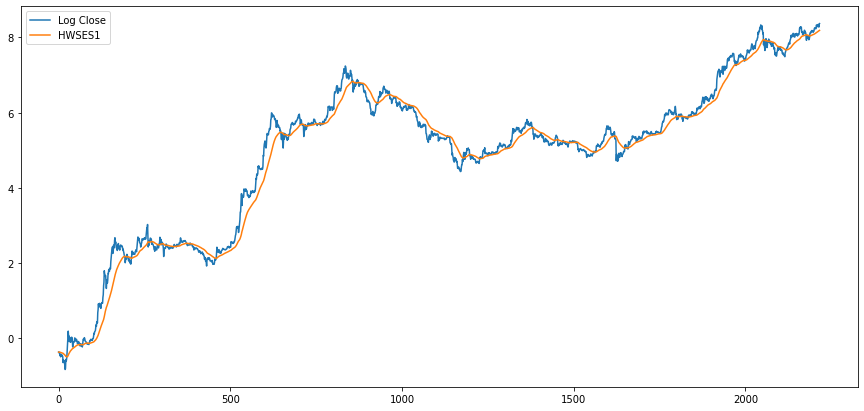

In [54]:
eth_hw['HWSES1'] = HWSES(eth_hw['Log Close']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
eth_hw[['Log Close','HWSES1']].plot(figsize=(15,7)).plot(title='Holt Winters Single Exponential Smoothing');

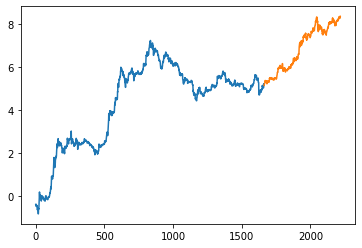

In [55]:
Train_HWES = Eth["Log Close"].loc[:1772]
Test_HWES = Eth["Log Close"].loc[1773:]
plt.plot(Train)
plt.plot(Test)

In [56]:
model_HWES = HWES(Train_HWES, seasonal_periods=12, trend='add', seasonal='add')
fitted = model_HWES.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



In [57]:
print(fitted.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                 1772
Model:             ExponentialSmoothing   SSE                              6.439
Optimized:                         True   AIC                          -9922.145
Trend:                         Additive   BIC                          -9834.468
Seasonal:                      Additive   AICC                         -9921.755
Seasonal Periods:                    12   Date:                 Mon, 15 Nov 2021
Box-Cox:                          False   Time:                         17:02:02
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9998712                alpha                 True
smoothing_slope          

In [58]:
close_forecast = fitted.forecast(steps=444)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



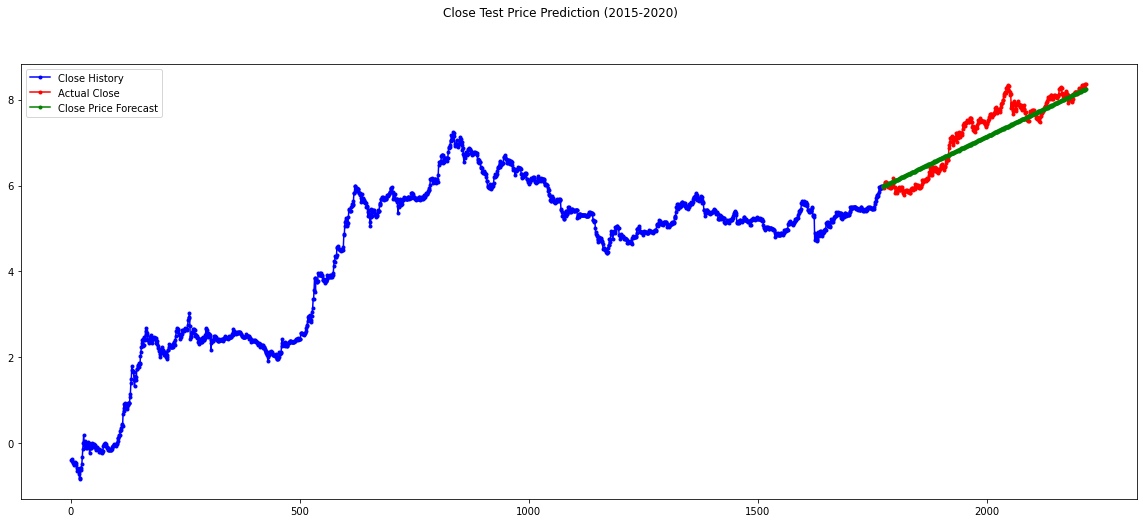

In [59]:
fig = plt.figure(figsize=(20,8))
fig.suptitle('Close Test Price Prediction (2015-2020)')
past = plt.plot(Train_HWES.index, Train_HWES, 'b.-', label='Close History')
future = plt.plot(Test_HWES.index, Test_HWES, 'r.-', label='Actual Close')
predicted_future = plt.plot(Test_HWES.index, close_forecast, 'g.-', label='Close Price Forecast')
plt.legend()
plt.show()

In [60]:
from sklearn.metrics import mean_squared_error

In [61]:
MSE_HW = mean_squared_error(Test_HWES, close_forecast)

In [62]:
MSE_HW

0.11618353475364333

In [63]:
RMSE_HW = np.sqrt(MSE_HW)

In [64]:
RMSE_HW

0.3408570591225057

#Prophet Technique

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objects as go
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly

import warnings
warnings.filterwarnings('ignore')

In [66]:
eth_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-10-01,0.734307,0.734307,0.655906,0.690215,0.690215,596084.0
2015-10-02,0.683732,0.691120,0.654605,0.678574,0.678574,219318.0
2015-10-03,0.678783,0.709204,0.675482,0.687171,0.687171,163326.0
2015-10-04,0.686343,0.693126,0.660716,0.668379,0.668379,103497.0
2015-10-05,0.666784,0.674438,0.624450,0.628643,0.628643,234263.0


In [67]:
df_pro = eth_data.reset_index()

In [68]:
df_pro.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-10-01,0.734307,0.734307,0.655906,0.690215,0.690215,596084.0
1,2015-10-02,0.683732,0.691120,0.654605,0.678574,0.678574,219318.0
2,2015-10-03,0.678783,0.709204,0.675482,0.687171,0.687171,163326.0
3,2015-10-04,0.686343,0.693126,0.660716,0.668379,0.668379,103497.0
4,2015-10-05,0.666784,0.674438,0.624450,0.628643,0.628643,234263.0


In [69]:
df_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2217 entries, 0 to 2216
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2217 non-null   datetime64[ns]
 1   Open       2217 non-null   float64       
 2   High       2217 non-null   float64       
 3   Low        2217 non-null   float64       
 4   Close      2217 non-null   float64       
 5   Adj Close  2217 non-null   float64       
 6   Volume     2217 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 121.4 KB


In [70]:
df_pro.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [71]:
eth_prophet = df_pro[["Date", "Open"]]
new_names = {"Date": "ds", "Open": "y"}
eth_prophet.rename(columns=new_names, inplace=True)

In [72]:
eth_prophet.head()

,ds,y
0,2015-10-01,0.734307
1,2015-10-02,0.683732
2,2015-10-03,0.678783
3,2015-10-04,0.686343
4,2015-10-05,0.666784


In [73]:
# plot the open price

x = eth_prophet["ds"]
y = eth_prophet["y"]

fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y))

# Set title
fig.update_layout(title_text="Time series plot of Ethereum Open Price")

#Set Categories
fig.update_layout(xaxis=dict(rangeselector=dict(buttons=list([
    dict(count=1, label="1m", step="month", stepmode="backward"),
    dict(count=6, label="6m", step="month", stepmode="backward"),
    dict(count=1, label="YTD", step="year", stepmode="todate"),
    dict(count=1, label="1y", step="year", stepmode="backward"),
    dict(step="all")])), rangeslider=dict(visible=True), type="date"))

In [74]:
model_pro = Prophet(seasonality_mode="multiplicative")
model_pro.fit(eth_prophet)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [75]:
future = model_pro.make_future_dataframe(periods = 365)
future.tail()

,ds
2577,2022-10-25
2578,2022-10-26
2579,2022-10-27
2580,2022-10-28
2581,2022-10-29


In [76]:
forecast = model_pro.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2577,2022-10-25,6982.238841,6114.878554,7863.104553
2578,2022-10-26,6845.499705,5994.092246,7714.084480
2579,2022-10-27,6810.060700,5946.069530,7671.013920
2580,2022-10-28,6692.626229,5861.006541,7507.509430
2581,2022-10-29,6467.042181,5631.865980,7274.461941


In [77]:
plot_plotly(model_pro, forecast)

In [78]:
plot_components_plotly(model_pro, forecast)